In [1]:
import dlc_practical_prologue as prologue
from modules import *
from helpers import *

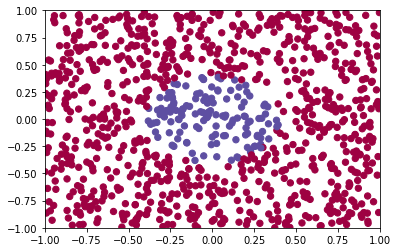

In [9]:
#generate disk data
N = 1000
train_input, train_target, test_input, test_target = generate_disk_data(nb_points=N)

fig = plt.figure()
plt.scatter(train_input[:, 0], train_input[:, 1], c=train_target, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

# Model learning using MSE loss

In [3]:
#model and criterion definition
model = Sequential(Linear(2,25), Tanh(), Linear(25,25),
                   ReLU(), Linear(25,25), ReLU(), Linear(25,2))
criterion = LossMSE()

In [4]:
#train the model
train_model(model, criterion, train_input, train_target, 10000, 
                100, 0.01, logging=True)

Epoch       Time    Train loss     Train accuracy      Train f-score  
[10000/10000]109s    0.0125         98.9000             0.9562         
On train set:
Accuracy: 98.9
F-score: 0.9561752988047808


(98.9, 0.9561752988047808)

In [5]:
#evaluate the model
evaluate_model(model, test_input, test_target, logging=True)

Accuracy: 97.89999999999999
F-score: 0.9252669039145908


(97.89999999999999, 0.9252669039145908)

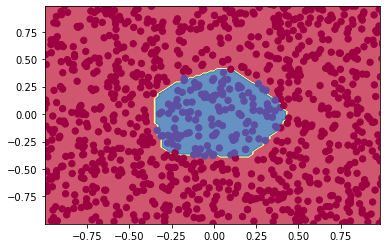

In [6]:
# plot the classifiers
plot_classifier(model, train_input, train_target, show=True)

# Model learning using cross-entropy loss

In [7]:
#model and criterion definition
model = Sequential(Linear(2,25), ReLU(), Linear(25,25),
                   ReLU(), Linear(25,25), ReLU(), Linear(25,2))
criterion = LossCrossEntropy()

In [8]:
#train the model
train_model(model, criterion, train_input, train_target, 1000, 
                100, 0.01, logging = True)

Epoch       Time    Train loss     Train accuracy      Train f-score  
[1000/1000] 33s     0.0159         99.8000             0.9922         
On train set:
Accuracy: 99.8
F-score: 0.9922480620155039


(99.8, 0.9922480620155039)

In [9]:
#evaluate the model
evaluate_model(model, test_input, test_target, logging=True)

Accuracy: 98.6
F-score: 0.9517241379310347


(98.6, 0.9517241379310347)

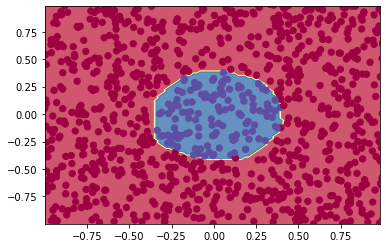

In [10]:
# plot the classifiers
plot_classifier(model, train_input, train_target)

In [2]:
train_input, train_target, test_input, test_target = prologue.load_data(normalize=True)

print('train_input', train_input.size(), 'train_target', train_target.size())
print('test_input', test_input.size(), 'test_target', test_target.size())


* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 10000 train and 10000 test samples
train_input torch.Size([10000, 784]) train_target torch.Size([10000])
test_input torch.Size([10000, 784]) test_target torch.Size([10000])


In [9]:
#model and criterion definition
model = Sequential(Linear(784,512), ReLU(), Linear(512,512),
                   ReLU(), Linear(512,512), ReLU(), Linear(512,10))
criterion = LossCrossEntropy()

In [10]:
#train the model
train_model(model, criterion, train_input, train_target, 1000, 
                100, 0.01, logging=True)

Epoch       Time    Train loss     Train accuracy      Train f-score  
[1000/1000] 1342s   0.0001         100.0000            1.0000         
On train set:
Accuracy: 100.0
F-score: 1.0


(100.0, 1.0)

In [13]:
#evaluate the model
evaluate_model(model, test_input, test_target, logging=True)

Accuracy: 95.17999999999999
F-score: 1.0


(95.17999999999999, 1.0)

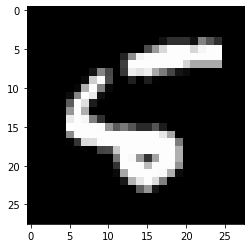

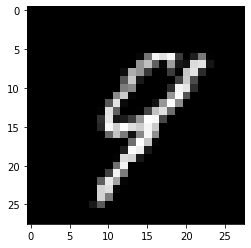

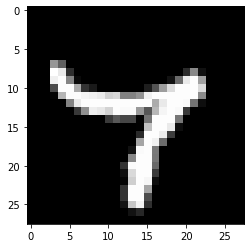

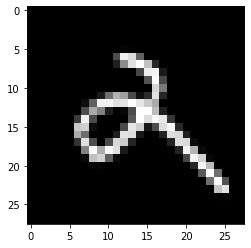

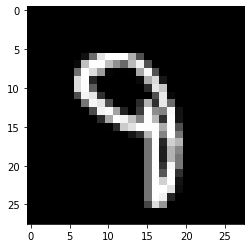

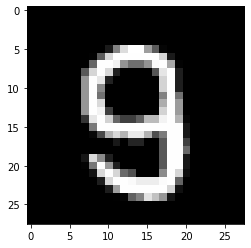

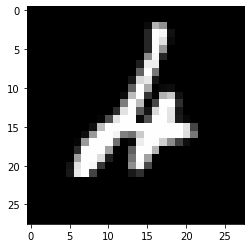

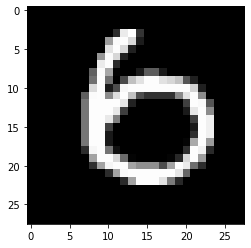

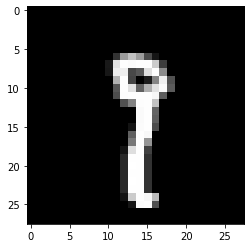

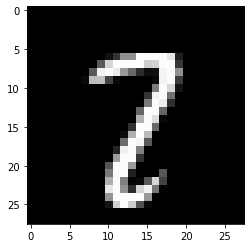

In [22]:
# Get the wrongly classified image, display some of them.
wrongly_classified = test_input[((model(test_input).argmax(1) - test_target) != 0)]
for i in range(10):
    img = wrongly_classified[i]
    img = np.array(img, dtype='float')
    pixels = img.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()